# Shallow Neural Network

Creating a shallow neural network from memory as a learning exercise.

The network will be 1 hidden layer with 4 neurons, and the output layer will be a single neuron.

## Import Libraries

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons, make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

m = 600
# data = make_circles(n_samples=m, factor=.5, noise=.03)
# data = make_moons(n_samples=m, noise=.2)
# data = make_classification(n_features=2, n_redundant=0, n_informative=2,
#                            n_clusters_per_class=1, n_samples=m)
data = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=2, n_samples=m)

X, y = data[0].T, data[1].reshape(1, -1)

idx = np.arange(X.shape[1])
np.random.shuffle(idx)

X_train = X[:, idx[0:400]]
X_test = X[:, idx[400:]]
y_train = y[:, idx[0:400]]
y_test = y[:, idx[400:]]

## Set up Functions

In [40]:
# 4 neurons in hidden layer
n_h = 4

def sigmoid(X):
    z = 1 / (1 + np.exp(-X))
    return z

def initialise_weights(X, y, n_h):
    n_x = X.shape[0]
    n_y = y.shape[0]
    # make this small so that sigmoid has an actual slope at the output
    W1 = np.random.randn(n_h, n_x) * .01
    b1 = np.zeros([n_h, 1])
    W2 = np.random.randn(n_y, n_h) * .01
    b2 = np.zeros([n_y, 1])
    
    init_params = dict()
    init_params['W1'] = W1
    init_params['b1'] = b1
    init_params['W2'] = W2
    init_params['b2'] = b2    
    
    return init_params

def forward_prop(X, params):
    m = X.shape[1]
    
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    preds = dict()
    preds['Z1'] = Z1
    preds['A1'] = A1
    preds['Z2'] = Z2
    preds['A2'] = A2
    
    return preds
    
def compute_cost(A2, y):
    m = y.shape[1]
    J = - np.sum(
        np.multiply(y, np.log(A2)) + np.multiply(1 - y, np.log(1 - A2))) / m
    return J

def backward_prop(X, y, params, preds):
    m = X.shape[1]

    Z1 = preds['Z1']
    A1 = preds['A1']
    Z2 = preds['Z2']
    A2 = preds['A2']
    
    W2 = params['W2']
    
    # dL/dZ2 = A - y and g'(W1) = 1 - np.power(A1, 2)
    dZ2 = A2 - y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    grads = dict()
    grads['dW2'] = dW2
    grads['db2'] = db2
    grads['dW1'] = dW1
    grads['db1'] = db1
    
    return grads
    
def update(X, y, grads, params, alpha):
    dW2 = grads['dW2']
    db2 = grads['db2']
    dW1 = grads['dW1']
    db1 = grads['db1']
    
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    W1 = W1 - (alpha * dW1)
    W2 = W2 - (alpha * dW2)
    b1 = b1 - (alpha * b1)
    b2 = b2 - (alpha * b2)
    
    params['W1'] = W1
    params['W2'] = W2
    params['b1'] = b1
    params['b2'] = b2
    
    return params
    
def fit(X, y, n_h, num_iterations, alpha):
    params = initialise_weights(X, y, n_h)
    for i in range(num_iterations):
        preds = forward_prop(X, params)
        J = compute_cost(preds['A2'], y)
        if i % 1000 == 0:
            print(f'cost after iter {i}: {J}')
        grads = backward_prop(X, y, params, preds)
        params = update(X, y, grads, params, alpha)
    return params, preds

def predict(X, params):
    preds = forward_prop(X, params)
    y_pred = preds['A2']
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = 0
    return y_pred
    

## Fit, Predict, Score

In [41]:
params, preds = fit(X_train, y_train, n_h, 10000, 1.2)
y_pred = predict(X_test, params)

print('accuracy: ',accuracy_score(y_test[0], y_pred[0]))

cost after iter 0: 0.6932650655857557
cost after iter 1000: 0.3111831168136374
cost after iter 2000: 0.3052009586004211
cost after iter 3000: 0.3028706241541369
cost after iter 4000: 0.30175559244175193
cost after iter 5000: 0.3010837531720564
cost after iter 6000: 0.30062543772129335
cost after iter 7000: 0.3002861814437631
cost after iter 8000: 0.3000199276478595
cost after iter 9000: 0.2998015838909202
accuracy:  0.905


## Visualise Performance

Plotting a visualisation here showing the test points against what the model calculates for different regions on the graph.

Note the regions here use `forward_prop`, so the regions take on values between 0 and 1 rather than being in the set (0, 1).

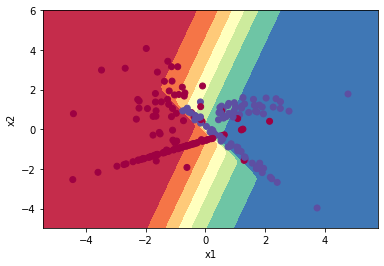

In [42]:
# Set min and max values for meshgrid
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1

# Generate a grid of points with distance h between them
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid using previous params
X_mesh = np.c_[xx.ravel(), yy.ravel()].T
Z = forward_prop(X_mesh, params)['A2']
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X_test[0, :], X_test[1, :], c=np.squeeze(y_test), cmap=plt.cm.Spectral)